In [1]:
from glob import glob
import pathlib
import pandas as pd
import numpy as np
import math
import re
from polyphys.manage import organizer
from polyphys.manage.parser import SumRule
from polyphys.probe import prober
from polyphys.analyze import analyzer
from polyphys.analyze import distributions

ModuleNotFoundError: No module named 'polyphys'

## test probe bug trj segments on pc:

In [ ]:
## This approach from HERE
path = pathlib.Path('../test_data/trjs-continuous/N500D10.0ac0.8-trjs')
path = path.resolve() # convert relative path to aabsolute one
input_database = str(path)
if not pathlib.Path(input_database).exists():
    raise OSError(f"'{input_database}'"
                    "path does not exist.")
## to HERE, does not work of * is used in the string input for Path.
geometry = 'biaxial'
group = 'bug'
hierarchy = '/N*/N*'
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
topologies = organizer.sort_filenames(observations, fmts=['.bug.data'])
trajectories = organizer.sort_filenames(observations, fmts=['.bug.lammpstrj'])
# 'bug' time series and historams
save_to = analyzer.database_path(input_database, phase='probe', stage='segment', group=None)
for topology in topologies:
    print(topology[0])
    topo_info = SumRule(topology[0],geometry=geometry, group=group, lineage='whole')
    save_to_whole = save_to + '/' + topo_info.whole
    save_to_whole = pathlib.Path(save_to_whole) 
    try:
        save_to_whole.mkdir(parents=True, exist_ok=False)
    except FileExistsError as error:
        print(error)
        print(
            f"Directory '{save_to_whole}'"
            " exist. Files are saved/overwritten to an existing directoy.")
    finally:
        save_to_whole = str(save_to_whole) + '/'
    for trajectory in trajectories:
        trj_info = SumRule(trajectory[0],geometry=geometry, group=group, lineage='segment')
        if trj_info.whole == topo_info.whole:
            if trj_info.segment_id ==10:
                prober.probe_bug(topology[0], trajectory[0], geometry, 'segment', save_to_whole)
            else:
                prober.probe_bug(topology[0], trajectory[0], geometry, 'segment', save_to_whole, continuous=True)

## check probe all trj segments on pc:

In [ ]:
path = pathlib.Path('../test_data/trjs-continuous/N500D10.0ac0.8-trjs')
path = path.resolve() # convert relative path to aabsolute one
input_database = str(path)
geometry = 'biaxial'
group = 'all'
hierarchy = '/N*/N*'
if not pathlib.Path(input_database).exists():
    raise OSError(f"'{input_database}'"
                    "path does not exist.")
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
topologies = organizer.sort_filenames(observations, fmts=['.all.data'])
trajectories = organizer.sort_filenames(observations, fmts=['.all.lammpstrj'])
# 'bug' time series and historams
save_to = analyzer.database_path(input_database, phase='probe', stage='segment', group=None)
for topology in topologies:
    topo_info = SumRule(topology[0],geometry=geometry, group=group, lineage='whole')
    save_to_whole = save_to + '/' + topo_info.whole
    save_to_whole = pathlib.Path(save_to_whole) 
    try:
        save_to_whole.mkdir(parents=True, exist_ok=False)
    except FileExistsError as error:
        print(error)
        print(
            f"Directory '{save_to_whole}'"
            " exist. Files are saved/overwritten to an existing directoy.")
    finally:
        save_to_whole = str(save_to_whole) + '/'
    for trajectory in trajectories:
        trj_info = SumRule(trajectory[0],geometry=geometry, group=group, lineage='segment')
        if trj_info.segment_id ==10:
            prober.probe_all(topology[0], trajectory[0], geometry, 'segment', save_to_whole)
        else:
            prober.probe_all(topology[0], trajectory[0], geometry, 'segment', save_to_whole, continuous=True)

### wholes

In [2]:
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
geometry = 'biaxial'
phase = 'analysis'
stage = 'wholeSim'
group = 'bug'
hierarchy = '/N*/N*'
relation = 'tseries'
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
observations = organizer.sort_filenames(observations, fmts=['bug-gyrTMon.npy'])
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
gyr_wholes = organizer.whole('gyrTMon', observations, geometry=geometry, group=group, relation=relation, save_to=save_to)

input_database = '../test_data/probe/N500D10.0ac0.8-segment'
geometry = 'biaxial'
phase = 'analysis'
stage = 'wholeSim'
group = 'all'
hierarchy = '/N*/N*'
relation = 'histogram'
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
observations = organizer.sort_filenames(observations, fmts=['-all-rHistMon.npy'])
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
rhist_wholes = organizer.whole('rHistMon', observations, geometry=geometry, group=group, relation=relation, save_to=save_to)

input_database = '../test_data/probe/N500D10.0ac0.8-segment'
geometry = 'biaxial'
phase = 'analysis'
stage = 'wholeSim'
group = 'all'
hierarchy = '/N*/N*'
relation = 'bin_edge'
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
observations = organizer.sort_filenames(observations, fmts=['-all-rEdgeMon.npy'])
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
redge_wholes = organizer.whole('rEdgeMon', observations, geometry=geometry, group=group, relation=relation, save_to=save_to)

[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-bug-wholeSim'
Directory '../test_data/analysis/N500D10.0ac0.8-bug-wholeSim' exist. Files are saved/overwritten to an existing directory.
[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-all-wholeSim'
Directory '../test_data/analysis/N500D10.0ac0.8-all-wholeSim' exist. Files are saved/overwritten to an existing directory.
[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-all-wholeSim'
Directory '../test_data/analysis/N500D10.0ac0.8-all-wholeSim' exist. Files are saved/overwritten to an existing directory.


### ensembles

In [3]:
group = 'bug'
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
phase = 'analysis'
stage = 'ens'
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
gyr_ens = organizer.ensemble(
    'gyrTMon',
    gyr_wholes,
    group=group,
    edge_wholes=None,
    save_to=save_to)
group = 'all'
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
phase = 'analysis'
stage = 'ens'
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
rhist_ens = organizer.ensemble(
    'rHistMon',
    rhist_wholes,
    group=group,
    edge_wholes=redge_wholes,
    save_to=save_to)


[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-bug-ens'
Directory '../test_data/analysis/N500D10.0ac0.8-bug-ens' exist. Files are saved/overwritten to an existing directory.
[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-all-ens'
Directory '../test_data/analysis/N500D10.0ac0.8-all-ens' exist. Files are saved/overwritten to an existing directory.


### Ensemble averages

In [4]:
group = 'bug'
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
phase = 'analysis'
stage = 'ensAvg'
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
gyr_ens_avg = analyzer.ensemble_avg(
    'gyrTMon',
    gyr_ens,
    group=group,
    save_to=save_to)
group = 'all'
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
phase = 'analysis'
stage = 'ensAvg'
save_to = analyzer.database_path(input_database, phase=phase, stage=stage, group=group)
rhist_ens_avg = analyzer.ensemble_avg(
    'rHistMon',
    rhist_ens,
    group=group,
    exclude=['bin_center'],
    save_to=save_to)

[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-bug-ensAvg'
Directory '../test_data/analysis/N500D10.0ac0.8-bug-ensAvg' exist. Files are saved/overwritten to an existing directory.
[Errno 17] File exists: '../test_data/analysis/N500D10.0ac0.8-all-ensAvg'
Directory '../test_data/analysis/N500D10.0ac0.8-all-ensAvg' exist. Files are saved/overwritten to an existing directory.


In [ ]:
gyr_ens_avg['N500D10.0ac0.8nc12012'].plot()

In [ ]:
rhist_ens['N500D10.0ac0.8nc12012']

### Distributions

In [ ]:
from polyphys.analyze.distributions import Distribution
from typing import Optional, Dict, Tuple
def distributions_generator(
    wholes: Dict[str, np.ndarray],
    bin_edges: Dict[str, np.ndarray],
    group,
    species,
    geometry,
    direction,
    save_to: Optional[str] = None,
    normalized: bool = False
) -> Tuple[Dict, Dict]:
    """
    generates the local number density (rho) and volume fraction (phi) \
    of the bead_name woth bead_type column name in properties \
    dataframe along the direction of interest in the geometry of interest.

    Caution:
    For the sumrule problem in the cylindrical goemetry, a simulation group \
    is a collection of simulations that all have the same values for the \
    number of monomers, the diameter of cylinder, and the size of crowders \
    (assuming size of monomers is 1). An ensemble (usually with M number of \
    simulations) is a collection of themodynamically-equivalent simulations \
    that all have the same values for the number of monomers, the diameter \
    of cylinder, the size of crowders, and the same number of crowders \
    (assuming size of monomers is 1).  In standard statitatical mechanical \
    approach, an ensmeble is equivalent a simulation, but here we used it \
    to reffer to all the thermodynamically-equivalent simulations.
    In an ensemble-average simulation group, each ensemble is replaced with \
    the average of all its simulation, so if we have M simulation in an \
    ensemble and P ensembles in a group, then we have M*P simulations in a \
    simulation group and P ensemble-averaged simulations in a \
    ensemble-averaged simulation group.

    Parameters:
    histogram (dict): a dictionary of an ensemble or ensemble-averaged or \
    group simulation in which the keys are the name of ensembles/\
    ensemble-averaged groups/groups and the keys of the histogram \
    dataframes. The names of the columns in each dataframe are the name of \
    simulations in an ensemble or the name of ensemble-averaged group or \
    the name of simulation group, the columns are the frequenies of \
    partilces of the type of interest (see radius_type) in each of the \
    bins, and the number of columns is the number of simulations in a \
    ensemble, one in an ensemble-averaged group, or the number of \
    ensmebles (=the number of ensemble-averaged) groups an a simulations \
    group.
    properties (pandas dataframe): the properties of each simulation/\
    ensemble-averaged simulation/ensemble-averaged simulations of the \
    simualtions/ensemble-averaged simulation/ensemble-averaged simulations \
    in a ensemble/ensemble-averged group/simulation group.
    raduis_type (str): the name of the column in the properties in which \
    the size (or diameter) of the particles are tabled. The particle type \
    is the same for all the particles that their frequencies are counted \
    in histogram.
    geometry (str): the shape of the simulation box
    direction (str): the direction of interest in the geometry of interest.
    bead_name: the name of paticle type.
    save_to: path to which the output saved.
    normalized: whether normalized the distributions or not.
    segments: wether a simulation file is created from a bunch of segments \
    or not -- This is the case for 'all' type files.
    """
    densities = {}
    vol_fractions = {}
    radius_attrs = {
        'Mon': 'dmon',
        'Crd':  'dcrowd'
        }
    for whole, histogram in wholes.items():
        whole_info = SumRule(
            whole,
            geometry=geometry,
            group=group,
            lineage='whole',
            ispath=False
        )
        distributions = Distribution(
            histogram,
            bin_edges[whole],
            whole_info,
            radius_attr=radius_attrs[species],
            geometry=geometry,
            direction=direction,
            normalized=normalized
        )
        vol_share = distributions.volume_shares
        densities[whole] = distributions.rho
        vol_fractions[whole] = distributions.phi
        if save_to is not None:
            filename = whole + '-' + group + '-' + direction
            np.save(
                filename + 'Rho' + species + '.npy', distributions.rho
            )
            np.save(
                filename + 'Phi' + species + '.npy', distributions.phi
            )
    return densities, vol_fractions, vol_share

In [ ]:
group = 'all'
species = 'Mon'
geometry = 'biaxial'
direction = 'r'
rho, phi, vol_share = distributions_generator(
    rhist_wholes,
    redge_wholes,
    group,
    species,
    geometry,
    direction)

In [ ]:
rho['N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1'].shape

In [ ]:
import numpy as np
np.pi * 2**3 / 6

In [ ]:
vol = 0
for value in vol_share[0].values():
    vol += value
print(vol)

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1,sharex=True)
axes[0].plot(rhist_wholes['N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1'])
axes[1].plot(rho['N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1'])
axes[2].plot(phi['N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1'])

In [6]:
ens = glob("./N2000*.csv")
print(ens)
print(ens[0])
rhist_crd= pd.read_csv('./N2000D20.0ac2.0nc15120.0-rHistsCrd.csv', header=0)
rhist_crd.rename(columns={"Unnamed: 0":"bin_center"}, inplace=True)
edge = np.loadtxt('./N2000epsilon5.0r10.5lz504sig2.0nc15120dt0.005bdump1000adump5000ens1-rEdges.csv')
wholes = {}
edges = {}
for col in rhist_crd.columns:
    if col!='bin_center' :
        wholes[col] = rhist_crd[col].values
        edges[col] = edge

['./N2000D20.0ac2.0nc15120.0-rPhisMon.csv', './N2000D20.0ac2.0nc15120.0-rRhosMon.csv', './N2000D20.0ac2.0nc15120.0-rHistsCrd.csv', './N2000D20.0ac2.0nc15120.0-rRhosCrd.csv', './N2000D20.0ac2.0nc15120.0-rHistsMon.csv', './N2000D20.0ac2.0nc15120.0-rPhisCrd.csv', './N2000epsilon5.0r10.5lz504sig2.0nc15120dt0.005bdump1000adump5000ens1-rEdges.csv']
./N2000D20.0ac2.0nc15120.0-rPhisMon.csv


In [14]:
group = 'all'
species = 'Crd'
geometry = 'biaxial'
direction = 'r'
rho, phi = distributions.distributions_generator(
    wholes,
    edges,
    group,
    species,
    geometry,
    direction,
    normalized=True)

<AxesSubplot:>

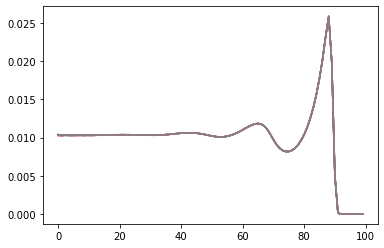

In [15]:
rho_df = pd.DataFrame(rho)
rho_df.plot(legend=False)

<AxesSubplot:>

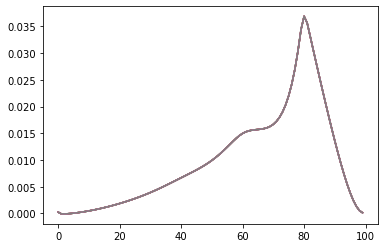

In [16]:
phi_df = pd.DataFrame(phi)
phi_df.plot(legend=False)

['./N2000D20.0ac2.0nc15120.0-rPhisMon.csv', './N2000D20.0ac2.0nc15120.0-rRhosMon.csv', './N2000D20.0ac2.0nc15120.0-rHistsCrd.csv', './N2000D20.0ac2.0nc15120.0-rRhosCrd.csv', './N2000D20.0ac2.0nc15120.0-rHistsMon.csv', './N2000D20.0ac2.0nc15120.0-rPhisCrd.csv', './N2000epsilon5.0r10.5lz504sig2.0nc15120dt0.005bdump1000adump5000ens1-rEdges.csv']
./N2000D20.0ac2.0nc15120.0-rPhisMon.csv


<AxesSubplot:>

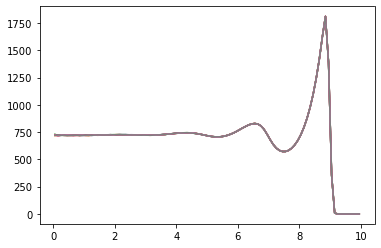

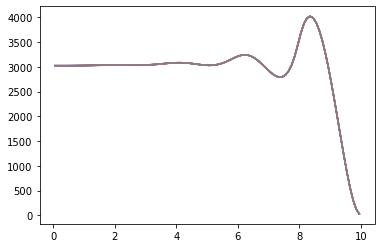

In [18]:
ens = glob("./N2000*.csv")
print(ens)
print(ens[0])
rrho_crd= pd.read_csv('./N2000D20.0ac2.0nc15120.0-rRhosCrd.csv', header=0, index_col=0)
rrho_crd.plot(legend=False)
rphi_crd= pd.read_csv('./N2000D20.0ac2.0nc15120.0-rPhisCrd.csv', header=0, index_col=0)
rphi_crd.plot(legend=False)

### whole_from_Segments

In [ ]:
input_database = '../test_data/probe/N500D10.0ac0.8-segment'
geometry = 'biaxial'
hierarchy = '/N*/N*'
lineage = 'segment'
observations = glob(input_database + hierarchy)
if observations == []:
    raise OSError(
        "File not found in "
        f"'{input_database + hierarchy}'"
        )
#save_to = analyzer.database_path(input_database, phase='analysis', stage='wholeSim', group=group)
analyzer.analyze_segments(input_database, geometry, hierarchy)

In [ ]:
from dask.distributed import Client
from dask import delayed
from dask import compute
client = Client(n_workers=4)
client

### This script is used in GNU-Parallel

In [ ]:
from glob import glob
from PipeLine import *

fname = glob("../N*.bug.*")
fname = PipeLine.file_reader(fname) # This is a list with one member

save_to="./"
geom = 'cylindrical'
print(fname)
PipeLine.extract_trj_bug(fname[0], geom, save_to) # A list with one member, the member is a tuple of a trj and data pair.
#PipeLine.bug_trj_rmsd(fname[0], geom, save_to) 

trj_files = glob("./N*all.lammpstrj")
all_tuples = PipeLine.file_reader(trj_files,extensions=['lammpstrj'])
all_trjs = [all_tuple[0] for all_tuple in all_tuples]

data_file = glob("./N*.all.data")
all_data = PipeLine.file_reader(data_file,extensions=['all.data'])
all_data = all_data[0][0]

    
for all_trj in all_trjs:
    print(all_trj)
    PipeLine.extract_trj_all(all_data, all_trj, geom, save_to)

## Standard approach: Running on clusters: extraction from orgaznied *trjs_all* and *trjs_bug* directories

### This are not work properly on Graham cluster but work well on iMacmini

### 1. Extract from an organized *trjs_bug* directory:

In [ ]:
# This script extract different bug's information from pairs (toplogy and trajectory) of bug simulation files in oen or more organized *trjs_bug* directories.
from pathlib import Path
import os
from glob import glob
from PipeLine import *
from dask.distributed import Client
from dask import delayed
from dask import compute

cores = 32
print(f"number of workers set to {cores}; is this the same requested cores on the cluster?")
client = Client(n_workers=cores)
home = str(Path.home())
cwdir = str(Path.cwd())
# information extraction from simulations
geom = 'cylindrical'
fname = glob(home+'/amirhsi_rrg/cylinder_simulations/N*-trjs_bug/N*bug*')
bug_pairs = PipeLine.file_reader(fname) # each bug_pair is a pair of trajectory and topopgy file.
trjs_computed = []
bug_dir = 'extraction_bug/'
for bug_pair in bug_pairs:
    sim_name = bug_pair[0].split("/")[-1].split('bug')[0]
    sim_dir = cwdir+bug_dir+sim_name
    Path(sim_dir).mkdir(parents=True, exist_ok=False)
    sim_save_to = sim_dir+"/"
    trj_delayed = delayed(PipeLine.extract_trj_bug)(bug_pair, geom,sim_save_to)
    trjs_computed.append(trj_delayed)
results = compute(trjs_computed)

### 2. Extract from an organized *trjs_all* directory:

In [ ]:
# This script extract different bug's information from pairs (toplogy and trajectory) of bug simulation files in oen or more organized *trjs_bug* directories.
from pathlib import Path
import os
from glob import glob
from PipeLine import *
from dask.distributed import Client
from dask import delayed
from dask import compute

cores = 32
print(f"number of workers set to {cores}; is this the same requested cores on the cluster?")
client = Client(n_workers=cores)
home = str(Path.home())
cwdir = str(Path.cwd())
sim_all_dirs = glob(home+'/amirhsi_rrg/cylinder_simulations/N*-trjs_all/N*/')
geom = 'cylindrical'

trjs_computed = []
all_extraction_dir = 'extraction_all/'
for sim_all_dir in sim_all_dirs:
    sim_name = sim_all_dir[0].split("/")[-1]
    all_trjs = glob(sim_all_dir+"N*.lammpstrj")
    all_trjs = PipeLine.file_reader(all_trjs,extensions=['lammpstrj'])
    all_trjs = [all_trj[0] for all_trj in all_trjs]

    all_topology = glob(sim_all_dir+"N*.all.data")
    all_topology = PipeLine.file_reader(all_topology,extensions=['all.data'])
    all_topology = all_topology[0][0]
    
    
    sim_extract_dir = cwdir+all_extraction_dir+sim_name
    Path(sim_extract_dir).mkdir(parents=True, exist_ok=False)
    sim_save_to = sim_extract_dir+"/"
    
    for all_trj in all_trjs:
        trj_delayed = delayed(PipeLine.extract_trj_all)(all_topology, all_trj, geom,sim_save_To)
        trjs_computed.append(trj_delayed)

results = compute(trjs_computed)

## Extraction from *extraction_bug* directory after a simulation

In [ ]:
home = str(Path.home())
path=home+'N2000epsilon5.0r10.5lz336sig1.0nc100800dt0.005bdump1000adump5000ens1'
fname = glob(path+"/N*.bug.*")
fname = PipeLine.file_reader(fname) # This is a list with one member
geom = 'cylindrical'
print(fname)
PipeLine.extract_trj_bug(fname[0], geom) # A list with one member, the member is a tuple of a trj and data pair.
PipeLine.rmsd_trj_bug(fname[0], geom)

In [ ]:
# all the segments in one trajectory: M dump files + one data file.
path='/Users/amirhsi_mini/N2000epsilon5.0r10.5lz336sig1.0nc100800dt0.005bdump1000adump5000ens*'
geom = 'cylindrical'
trj_files = glob(path+"/N*.lammpstrj")
all_tuples = PipeLine.file_reader(trj_files,extensions=['lammpstrj',])
all_trjs = [all_tuple[0] for all_tuple in all_tuples]
data_file = glob(path+"/N*.all.data")
all_data = PipeLine.file_reader(data_file,extensions=['all.data'])
all_data = all_data[0][0]
for all_trj in all_trjs:
    PipeLine.extract_trj_all(all_data, all_trj, geom)

## New approach: tested on iMac Pro:

### A single ensemble with one or more segments with one data file

In [ ]:
path='/Users/amirhsi_mini/N2000epsilon5.0r15.5lz379.5sig6.0nc1068dt0.005bdump1000adump5000ens*'
#path='/Users/amirhsi_mini/N1000epsilon5.0r8.0lz308.5sig2.0nc10412dt0.005bdump1000adump5000ens*'
geom = 'cylindrical'
trj_files = glob(path+"/N*all*")
all_pairs = PipeLine.file_reader(trj_files)
trjs_computed = []
for all_pair in all_pairs:
    trj_delayed = delayed(PipeLine.extract_all_trj_polymer_cog_fsd)(all_pair[1], all_pair[0], geom)
    trjs_computed.append(trj_delayed)

In [ ]:
%%time
results = compute(trjs_computed)

### N ensemble with N data file, each ensemble with one or more segments 

In [ ]:
path='/Users/amirhsi_mini/N2000epsilon5.0r15.5lz379.5sig6.0nc1068dt0.005bdump1000adump5000ens*'
#path='/Users/amirhsi_mini/N1000epsilon5.0r8.0lz308.5sig2.0nc10412dt0.005bdump1000adump5000ens*'
geom = 'cylindrical'
trj_pathes = glob(path+"/N*all*")
trjs = PipeLine.file_reader(trj_pathes,extensions=['lammpstrj'])
trjs = [trj[0] for trj in trjs]
topology_pathes = glob(path+"/N*.all.data")
topologies = PipeLine.file_reader(topology_pathes,extensions=['all.data'])
topologies = [topology[0] for topology in topologies]

In [ ]:
def simulation(pair):
    """
    simulation_pair pairs an "all" topology file with all the "all" trjectories of that "all" topology.
    
    Parameters:
    pair (list of tuples): a list in whic each tuple is  pair of topolgy and trajectories of a simulations.
    
    Return:
    a dict of of simulation pairs.
    """
    return {'topology':pair[0], 'trajectories':pair[1]}

In [ ]:
ens_names = [topology.split("/")[-1].split('.all')[0] for topology in topologies]
ens_names = list(dict.fromkeys(ens_names))
trjs_per_ens = []
for ens_name in ens_names:
    ens_trjs = []
    for trj in trjs:
        trj_name = trj.split("/")[-1].split(".all")[0]
        if trj_name == ens_name:
            ens_trjs.append(trj)
            #ensembles[key]['trajectories'] = trj
    trjs_per_ens.append(ens_trjs)
ensembles= dict(zip(ens_names,list(map(simulation,list(zip(topologies,trjs_per_ens))))))

In [ ]:
geom = 'cylindrical'
trjs_computed = []
for ensemble in ensembles.values():
    for trj_segment in ensemble['trajectories']:
        trj_delayed = delayed(PipeLine.extract_trj_all)(ensemble['topology'], trj_segment, geom)
        trjs_computed.append(trj_delayed)

In [ ]:
%%time
results = compute(trjs_computed)